# Moral Hazard
-  Do government policies affect (un)employment policies?
 - In economics, moral hazard occurs when an entity has an incentive to increase its exposure to risk because it does not bear the full costs of that risk. 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels import regression

## Importing data

In [92]:
macro = pd.read_csv(r'Macroecomics indicators.csv', sep=';', parse_dates=True, index_col=0)
macro = macro.sort_index(axis=0)
pop = pd.read_csv(r'Popularity.csv', sep=';', parse_dates=True, index_col='DATA')
pop = pop.sort_index(axis=0)


## Manipulating time series

In [93]:
macroQ = macro.asfreq(freq='Q', method='ffill')
macroQ
popQ = pop.asfreq(freq='Q', method='ffill')
popQ

serieI = pd.concat([macroQ, popQ], axis=1).dropna()
serieI.columns
serieI

,Desemprego,Inflação,Dívida/PIB,PRESIDENTE,POSITIVA,REGULAR,NEGATIVA,NS
2012-03-31,7.9,5.77,52.72,Dilma Rousseff,62.0,29.0,7.0,1.0
2012-06-30,7.5,5.00,53.42,Dilma Rousseff,62.0,29.0,7.0,1.0
2012-09-30,7.1,5.24,54.05,Dilma Rousseff,62.0,29.0,7.0,1.0
2012-12-31,6.9,5.61,53.67,Dilma Rousseff,62.0,29.0,7.0,1.0
2013-03-31,8.0,6.35,54.05,Dilma Rousseff,43.0,35.0,20.0,1.0
2013-06-30,7.4,6.56,53.61,Dilma Rousseff,43.0,35.0,20.0,1.0
2013-09-30,6.9,6.07,52.95,Dilma Rousseff,43.0,35.0,20.0,1.0
2013-12-31,6.2,5.84,51.54,Dilma Rousseff,43.0,35.0,20.0,1.0
2014-03-31,7.2,5.81,51.79,Dilma Rousseff,40.0,32.0,27.0,1.0
2014-06-30,6.8,6.39,52.75,Dilma Rousseff,40.0,32.0,27.0,1.0


In [120]:
(90/100, 80/100, )

(0.9, 0.8)

### Linear regression

In [115]:
def reg (X, Y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    return model.summary()

reg(serieI['POSITIVA'], serieI['Desemprego'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Desemprego   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     30.46
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           6.72e-06
Time:                        09:04:53   Log-Likelihood:                -58.778
No. Observations:                  30   AIC:                             121.6
Df Residuals:                      28   BIC:                             124.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9520      0.527     22.682      0.000      10.873      13.031
POSITIVA      -0.0882      0.016     -5.519      0.000      -0.121      -0.055
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   0.349
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.505
Skew:                           0.042   Prob(JB):                        0.777
Kurtosis:                       2.370   Cond. No.                         53.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
reg(serieI['POSITIVA'], serieI['Dívida/PIB'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Dívida/PIB   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     38.95
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           9.59e-07
Time:                        09:05:12   Log-Likelihood:                -97.448
No. Observations:                  30   AIC:                             198.9
Df Residuals:                      28   BIC:                             201.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.3266      1.912     38.343      0.000      69.409      77.244
POSITIVA      -0.3618      0.058     -6.241      0.000      -0.480      -0.243
==============================================================================
Omnibus:                        7.079   Durbin-Watson:                   0.259
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.313
Skew:                           0.871   Prob(JB):                       0.0702
Kurtosis:                       4.102   Cond. No.                         53.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
reg(serieI['POSITIVA'], serieI['Inflação'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Inflação   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                   0.01882
Date:                Wed, 04 Aug 2021   Prob (F-statistic):              0.892
Time:                        09:05:45   Log-Likelihood:                -65.473
No. Observations:                  30   AIC:                             134.9
Df Residuals:                      28   BIC:                             137.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0632      0.659      9.205      0.000       4.714       7.413
POSITIVA      -0.0027      0.020     -0.137      0.892      -0.044       0.038
==============================================================================
Omnibus:                        1.102   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.576   Jarque-Bera (JB):                1.054
Skew:                           0.313   Prob(JB):                        0.590
Kurtosis:                       2.328   Cond. No.                         53.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Graphics 

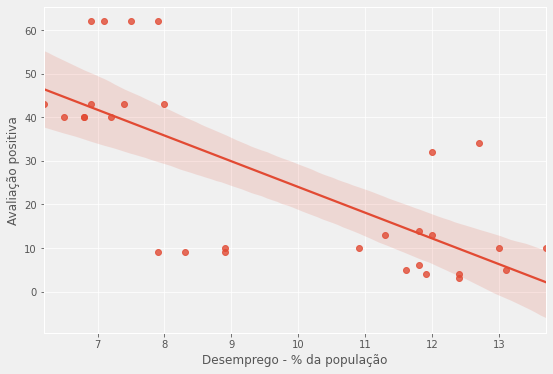

In [107]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 6), facecolor="#f0f0f0")
ax.set_facecolor("#f0f0f0")
sns.regplot(data=serieI, 
            x='Desemprego',
            y='POSITIVA')
plt.ylabel('Avaliação positiva')
plt.xlabel('Desemprego - % da população')
plt.show()

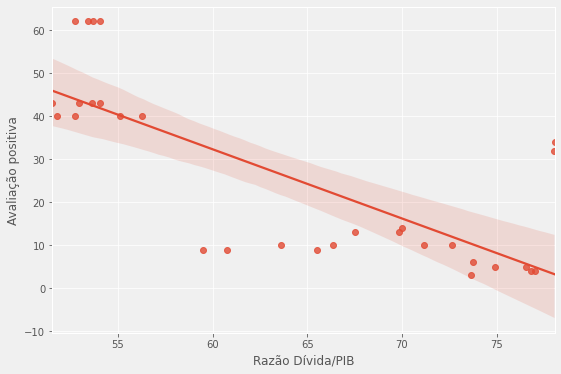

In [114]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 6), facecolor="#f0f0f0")
ax.set_facecolor("#f0f0f0")
sns.regplot(data=serieI, 
            x='Dívida/PIB',
            y='POSITIVA')
plt.ylabel('Avaliação positiva')
plt.xlabel('Razão Dívida/PIB')
plt.show()

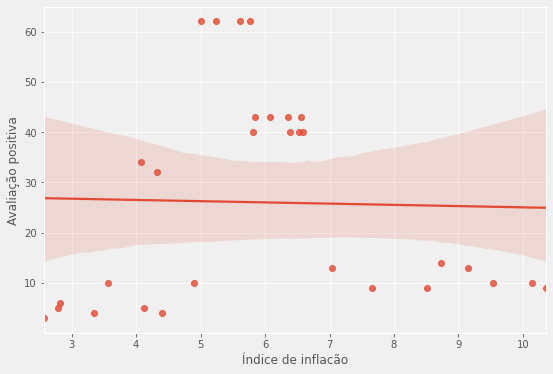

In [113]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 6), facecolor="#f0f0f0")
ax.set_facecolor("#f0f0f0")
sns.regplot(data=serieI, 
            x='Inflação',
            y='POSITIVA')
plt.ylabel('Avaliação positiva')
plt.xlabel('Índice de inflacão')
plt.show()

### Others graphics

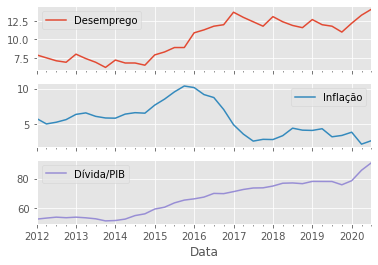

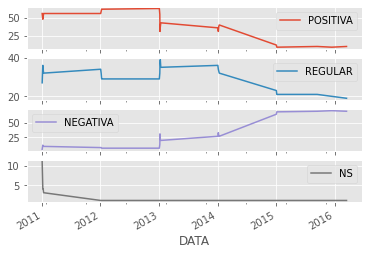

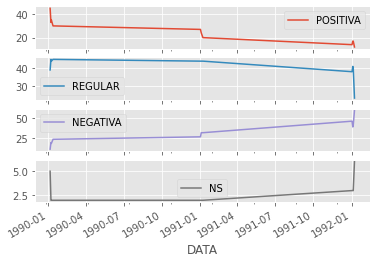

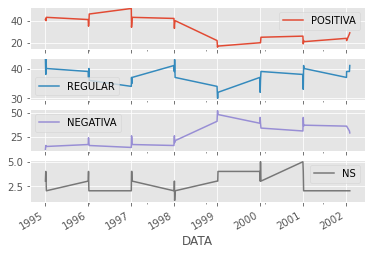

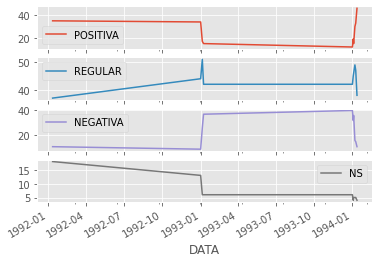

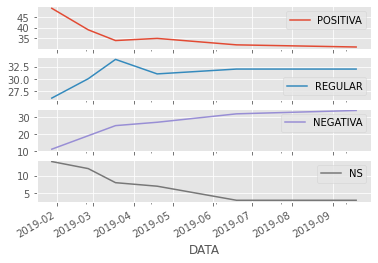

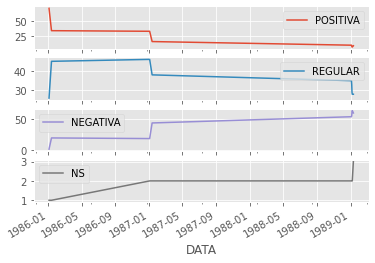

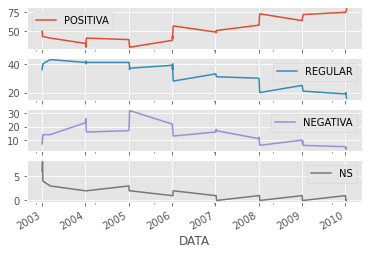

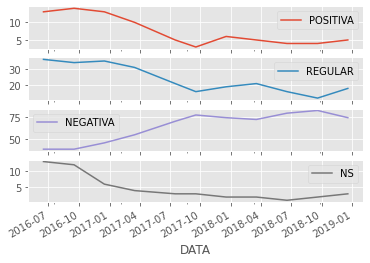

In [108]:
macro.plot(subplots=True)
plt.show()


pop.groupby('PRESIDENTE').plot(subplots=True)
plt.show()